In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


In [7]:
df = pd.read_csv("Sales_Product_Combined.csv")

product_types = df['Product Type'].unique()
print(product_types)
product_type_counts = df['Product Type'].value_counts()
print(product_type_counts)
product_df = df[df['Product Type'] == Product]

['Cable' 'Headphones' 'Phone' 'Laptop' 'Monitor' 'Batteries' 'iPhone' 'TV'
 'Dryer' 'Machine']
Product Type
Headphones    47756
Cable         43561
Batteries     41218
Monitor       24019
Laptop         8852
Phone          7590
iPhone         6842
TV             4800
Machine         666
Dryer           646
Name: count, dtype: int64


In [8]:
Product = 'Laptop'


product_df['Price'] = product_df['Price'].str.replace(',', '').astype(float)

product_df['Sales'] = product_df['Price'] * product_df['Quantity Ordered']

product = product_df.groupby('Order Date').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).reset_index()

# Dropping the 'Quantity Ordered' column
product.drop(columns=['Quantity Ordered'], inplace=True)

print(product)



     Order Date     Sales
0    01-01-2019  24299.91
1    01-01-2020   3699.98
2    01-02-2019  18499.90
3    01-03-2019  37399.83
4    01-04-2019  37199.90
..          ...       ...
361  31-05-2019  31399.89
362  31-07-2019  35099.87
363  31-08-2019  19899.92
364  31-10-2019  47199.80
365  31-12-2019  51499.74

[366 rows x 2 columns]


C:\Users\Cake\AppData\Local\Temp\ipykernel_7344\3858538441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Price'] = product_df['Price'].str.replace(',', '').astype(float)
C:\Users\Cake\AppData\Local\Temp\ipykernel_7344\3858538441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Sales'] = product_df['Price'] * product_df['Quantity Ordered']


Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6607.530, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6569.069, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6605.737, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6608.767, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=6569.646, Time=0.13 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=6569.250, Time=0.14 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=6567.396, Time=0.11 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=6610.119, Time=0.05 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=6568.990, Time=0.19 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.19 s

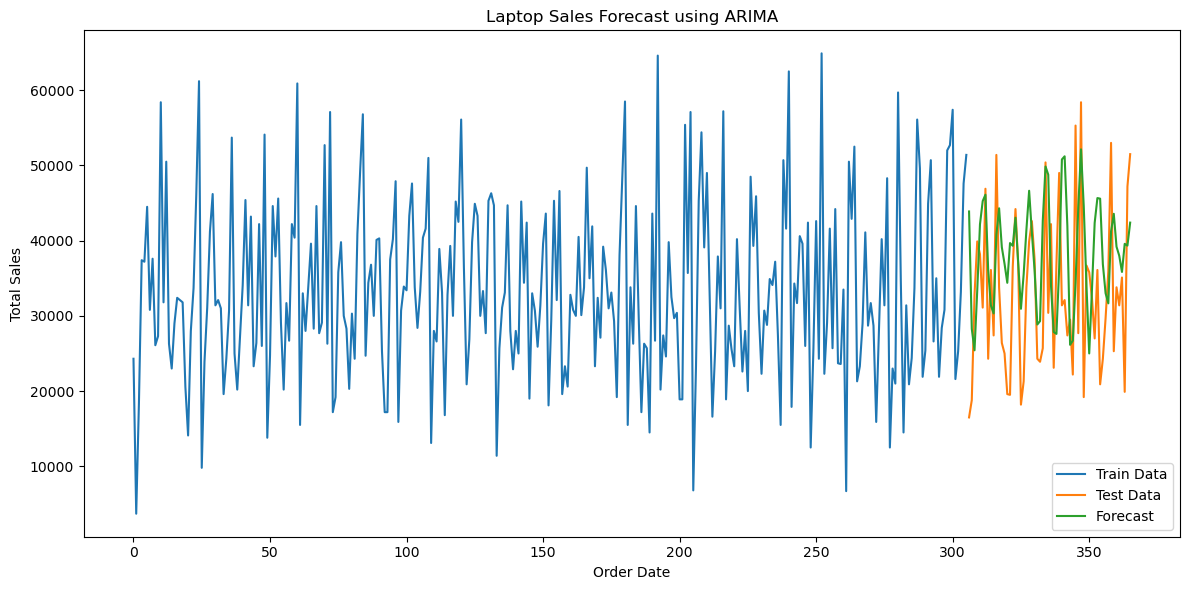

6494.492163083286


In [24]:
train_data, test_data = train_test_split(product['Sales'], test_size=60, shuffle=False)

stepwise_model = auto_arima(train_data, 
                            start_p=2, start_q=0,
                            max_p=9, max_q=2, m=7,  # p,q = 1, 2, 3 
                            start_P=0, seasonal=True,
                            d=0, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

forecast = stepwise_model.predict(n_periods=60)

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Train Data')
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title(Product + ' Sales Forecast using ARIMA')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=7486.731, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=7442.075, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=7484.836, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=7488.563, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=7442.285, Time=0.15 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=7443.395, Time=0.23 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=7437.329, Time=0.12 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=7490.498, Time=0.05 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=7439.086, Time=0.22 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.33 s

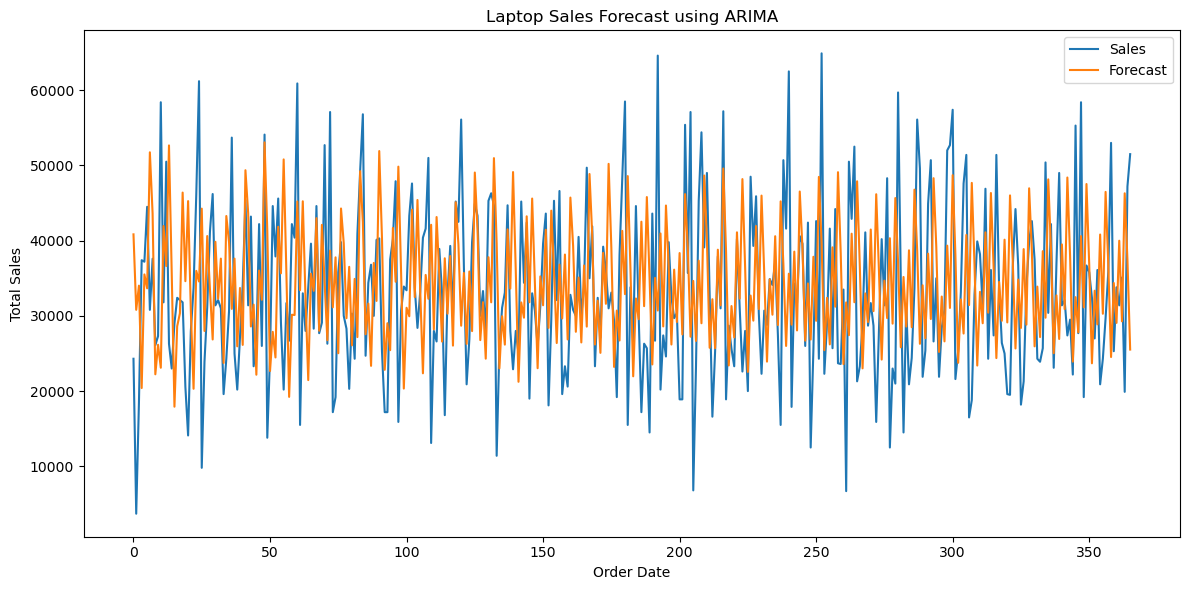

7348.859489540333


In [36]:
train_data, test_data = train_test_split(product['Sales'], test_size=20, shuffle=False)

stepwise_model = auto_arima(train_data,
                             start_p=2, start_q=0,
                             max_p=9, max_q=2, m=7,  # p,q = 1, 2, 3
                             start_P=0, seasonal=True,
                             d=0, D=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

# Extend the forecast for a year (366 days)
forecast = stepwise_model.predict(n_periods=366)

# Combine train and test data for the entire plotted range
combined_data = pd.concat([train_data, test_data])
dates = combined_data.index

# Plot the combined data and the extended forecast
plt.figure(figsize=(12, 6))
plt.plot(dates, combined_data.values, label='Sales')
plt.plot(dates, forecast, label='Forecast')
plt.title(Product + ' Sales Forecast using ARIMA')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

print(stepwise_model.aic())


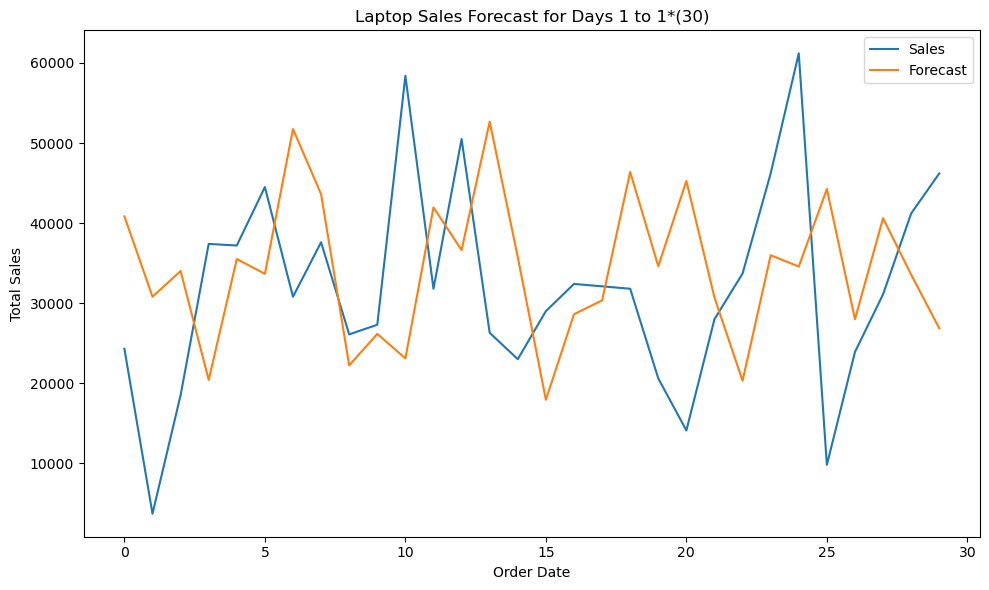

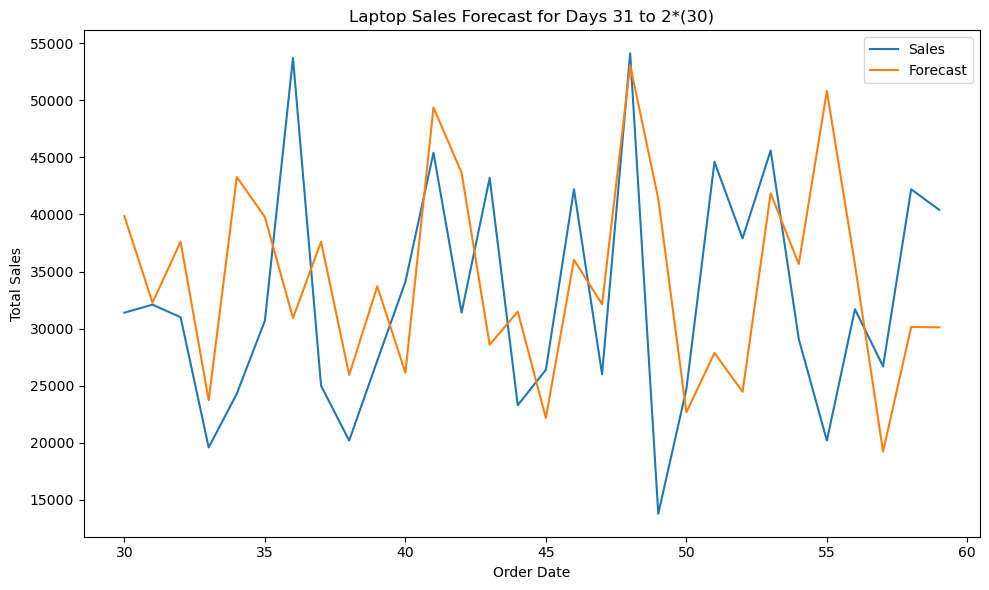

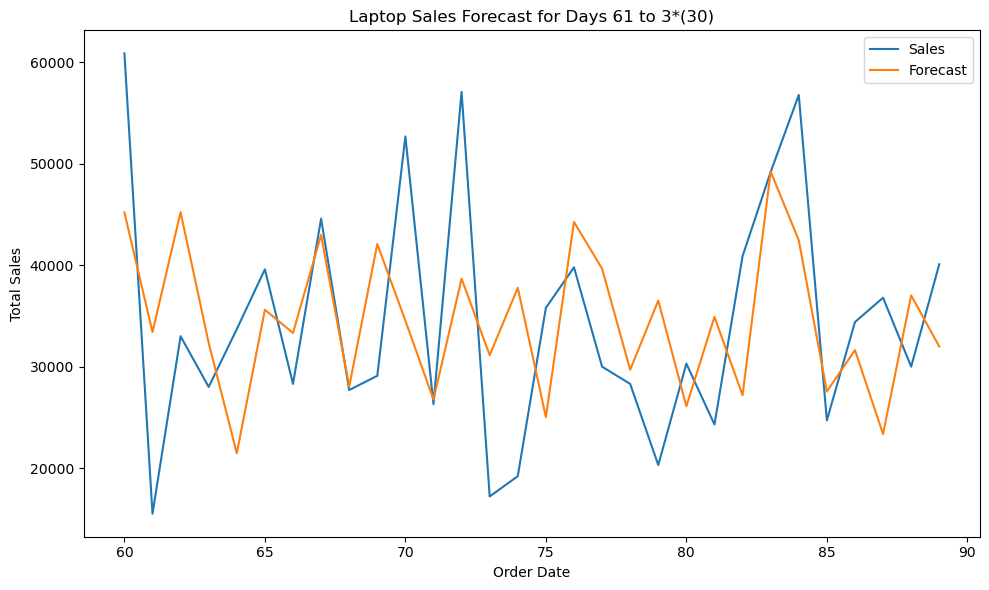

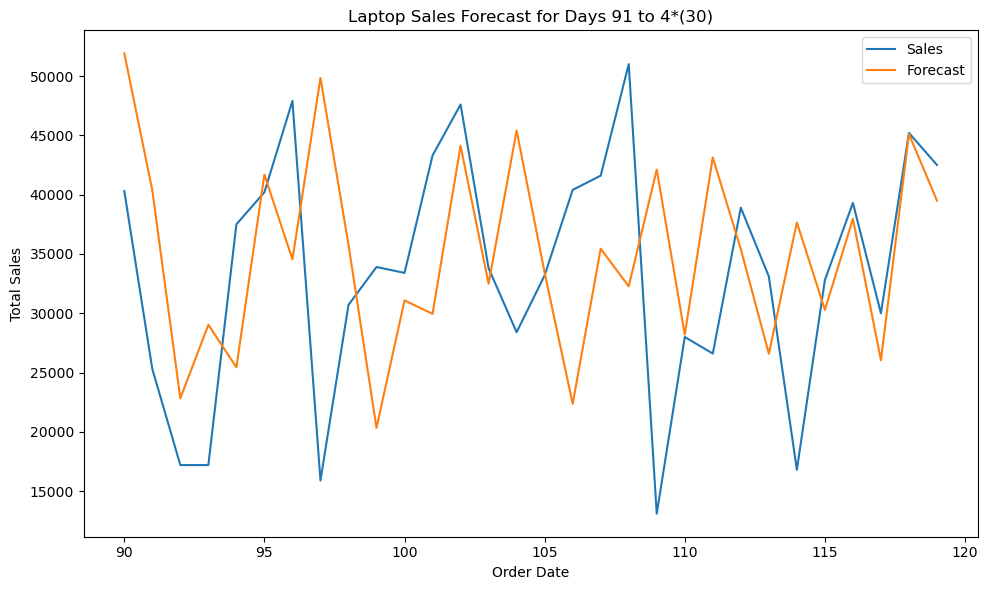

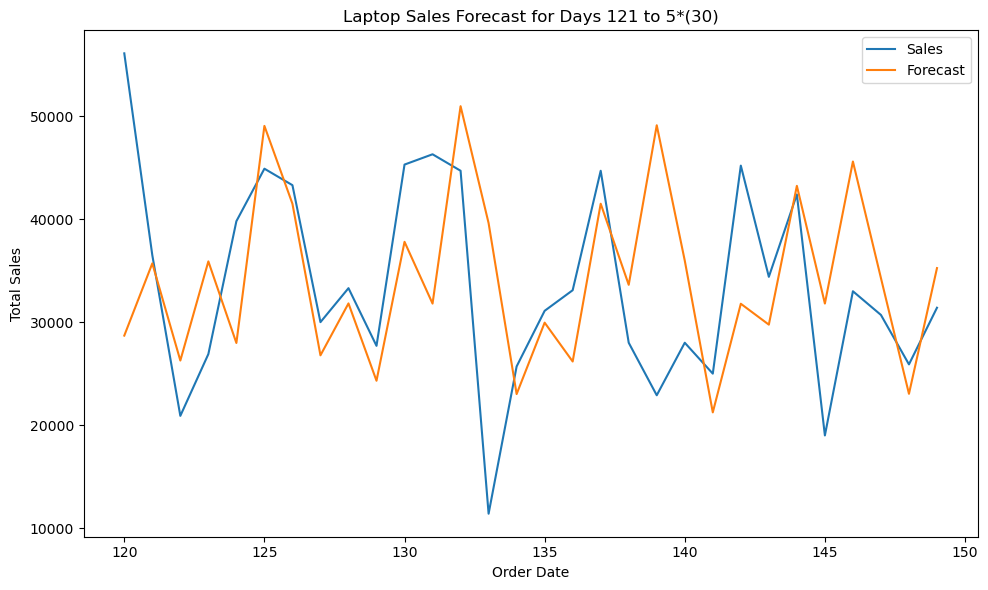

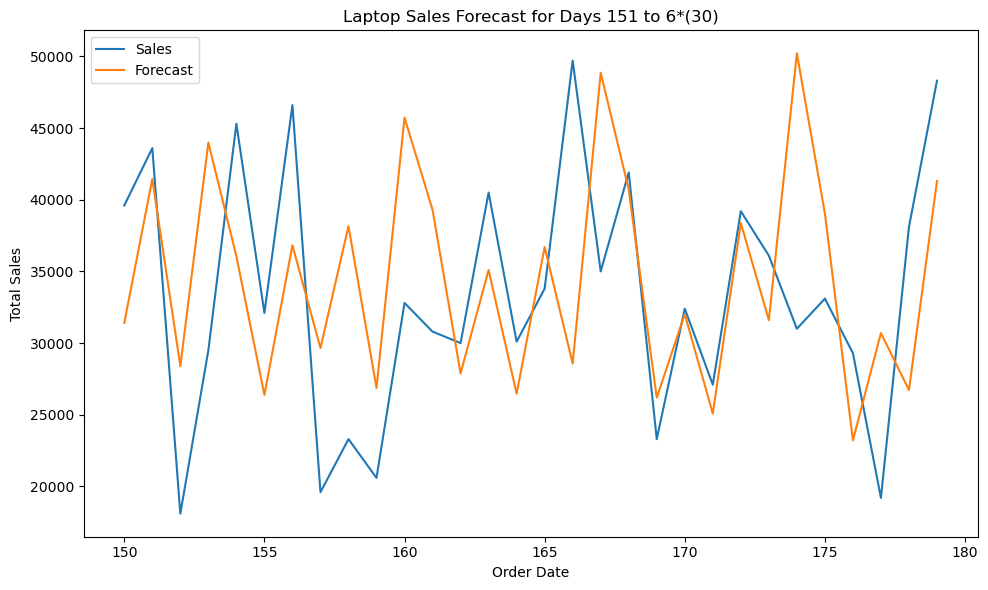

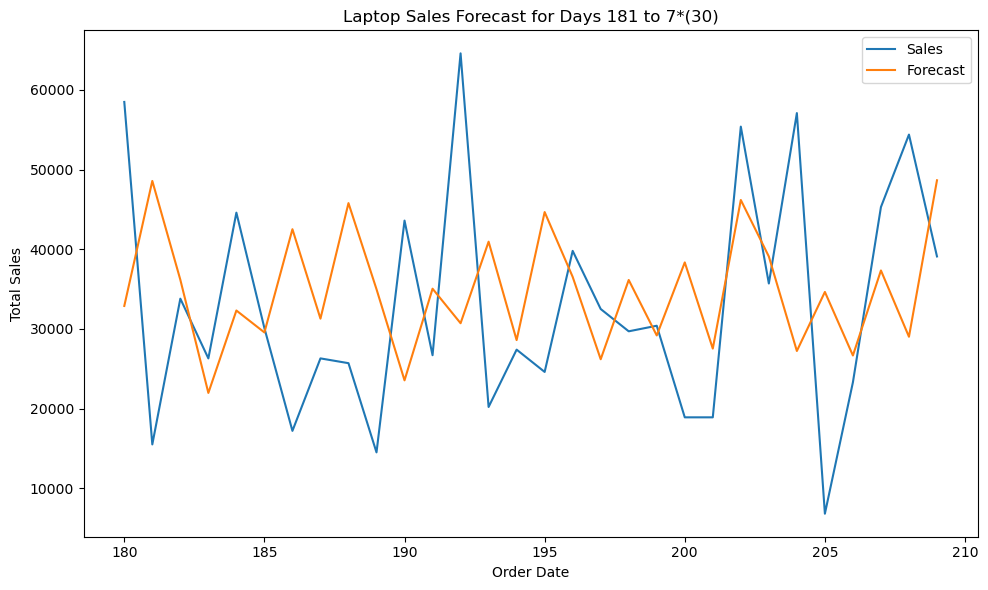

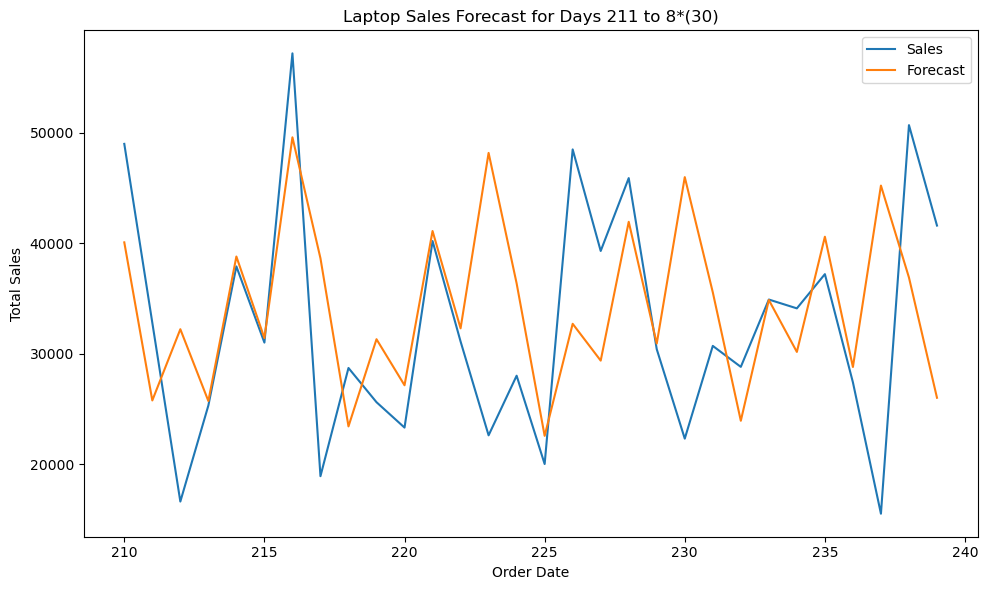

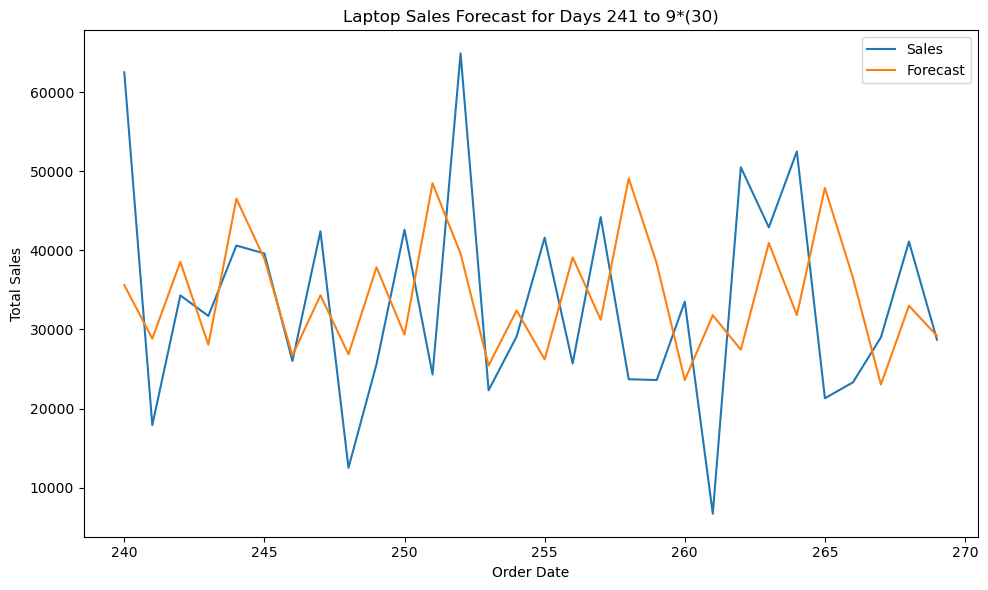

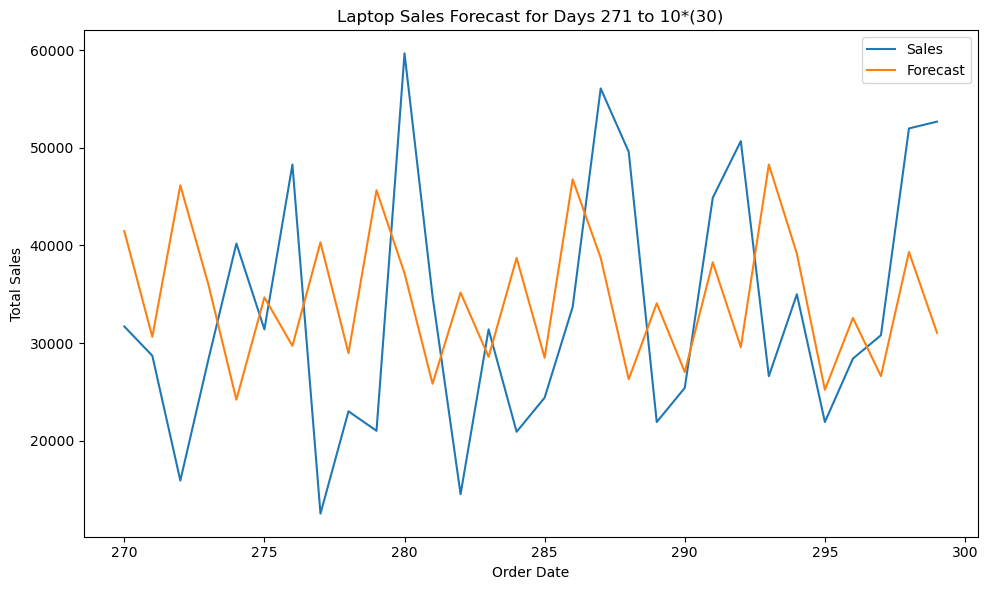

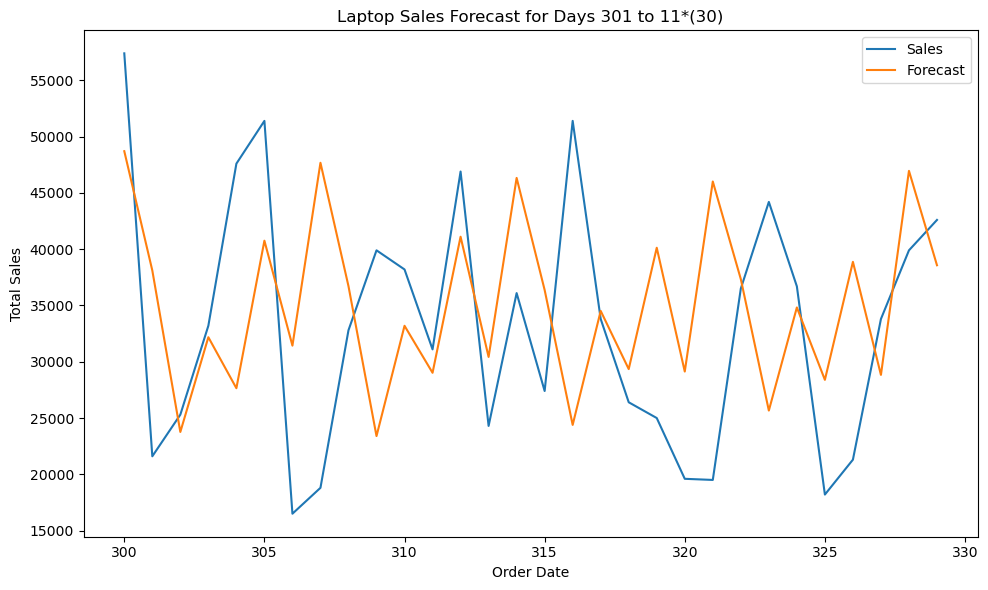

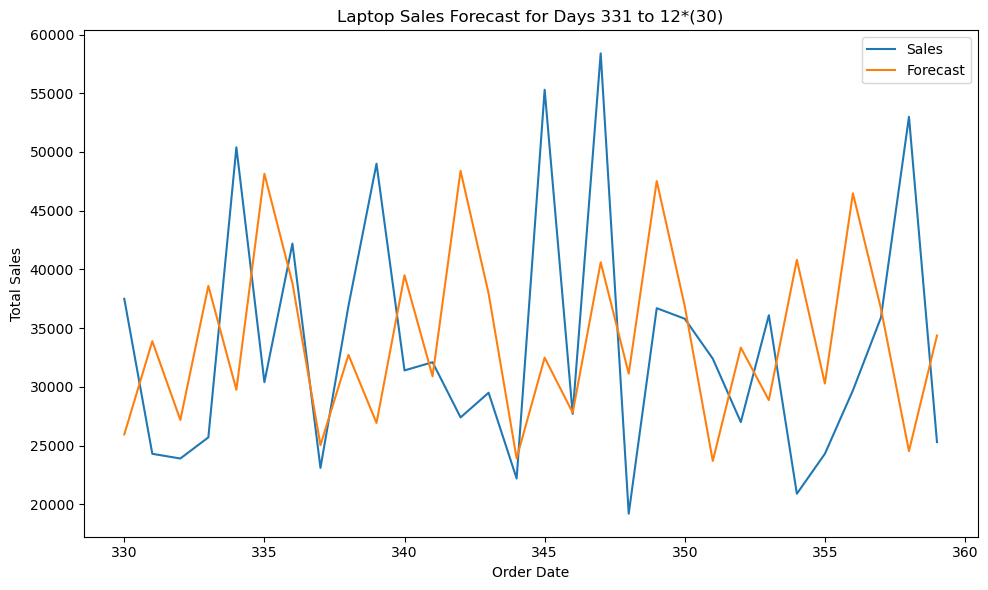

In [40]:
import matplotlib.pyplot as plt

# Define the number of days per "month"
month_length = 30

# Calculate the number of "months"
num_months = int(len(combined_data) / month_length)

# Loop through each "month"
for i in range(num_months):
    start_index = i * month_length
    end_index = (i + 1) * month_length

    month_data = combined_data.iloc[start_index:end_index]
    month_forecast = forecast.iloc[start_index:end_index]
    dates = month_data.index

    plt.figure(figsize=(10, 6))
    plt.plot(dates, month_data.values, label='Sales')
    plt.plot(dates, month_forecast, label='Forecast')
    
    # Adjust title based on the 30-day increment
    month_label = f"Days {(i+1)*month_length - month_length + 1} to {i+1}*({month_length})"
    plt.title(Product + ' Sales Forecast for ' + month_label)

    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


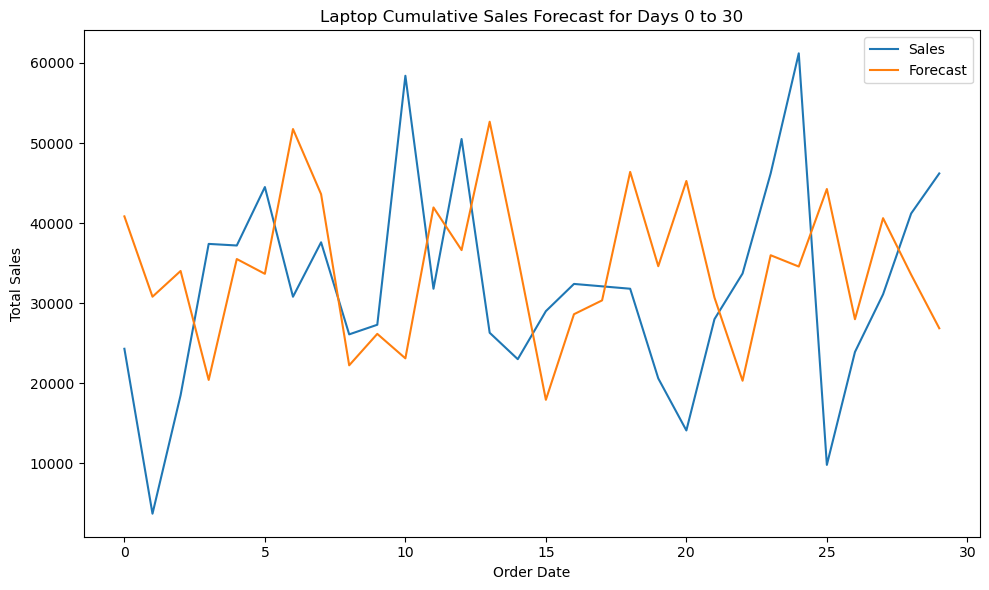

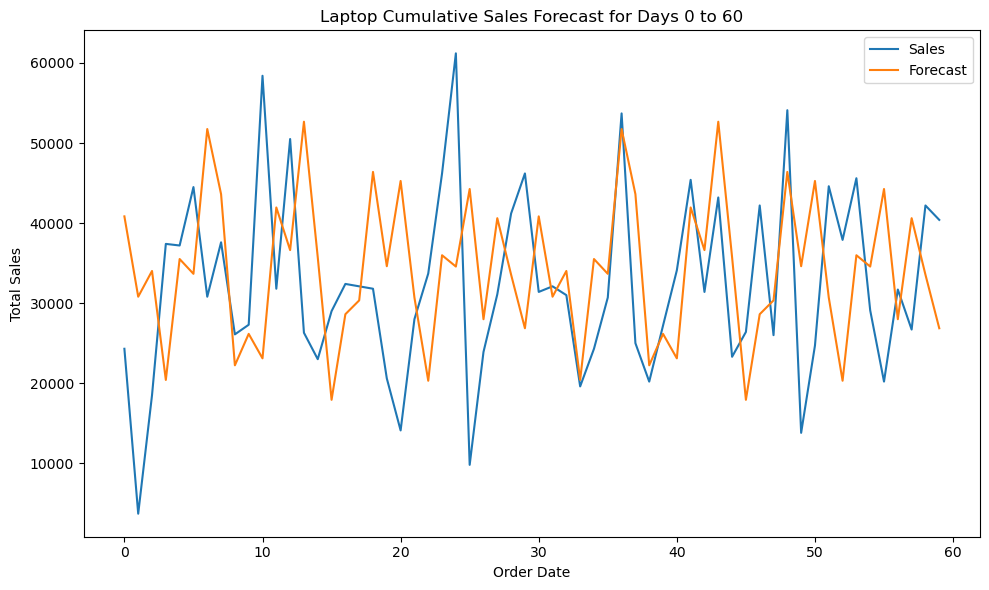

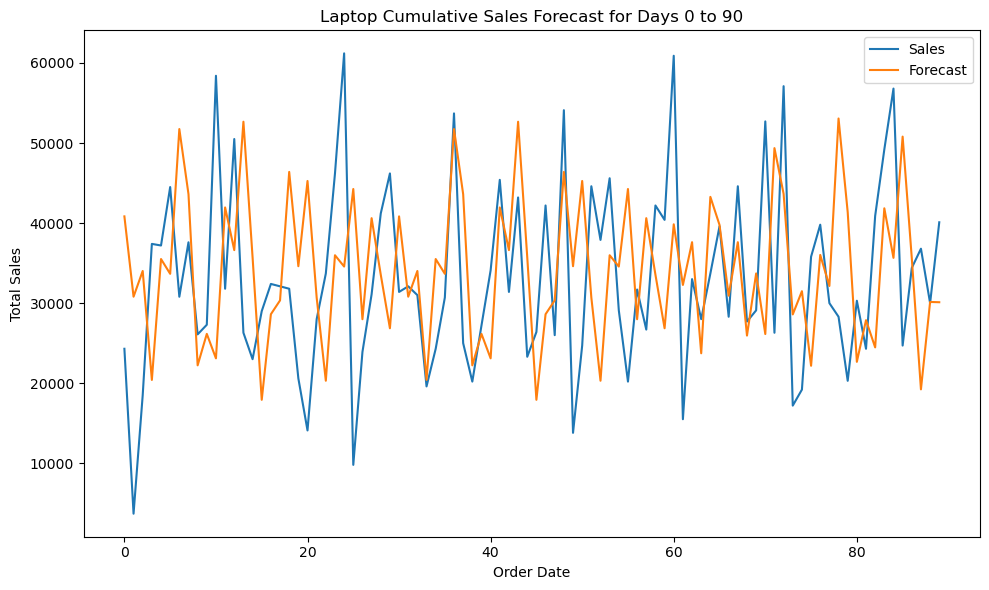

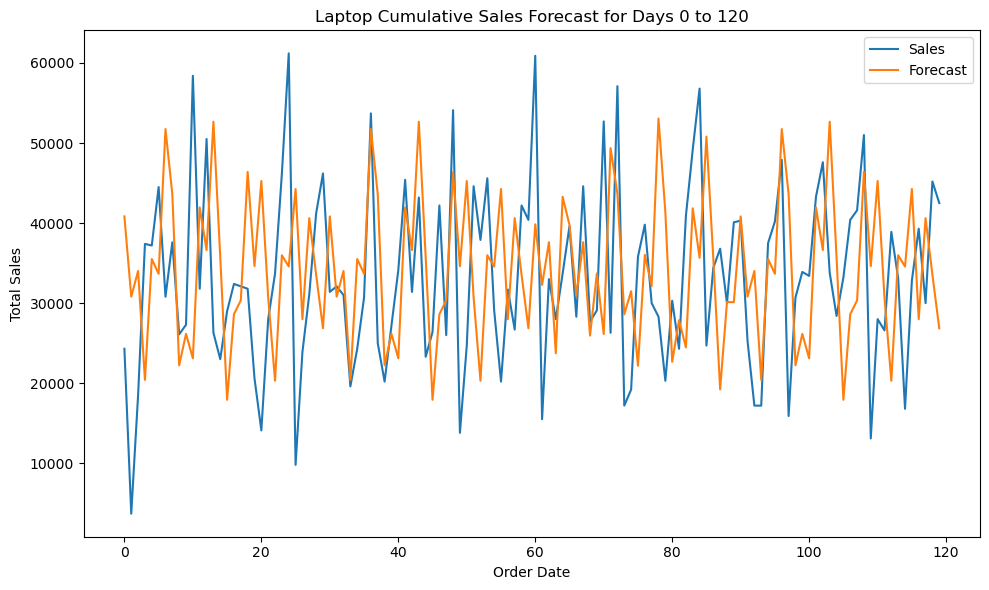

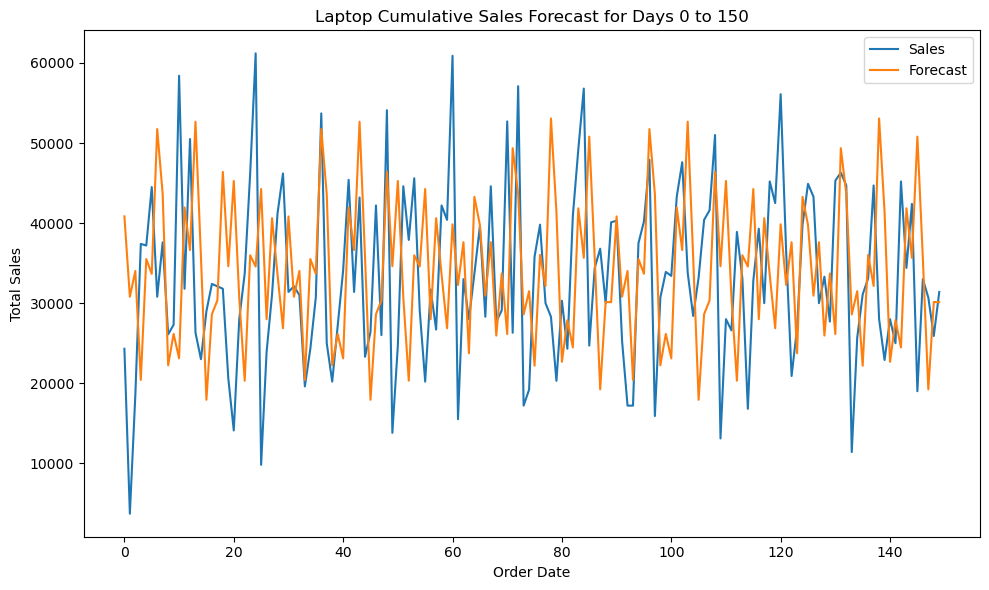

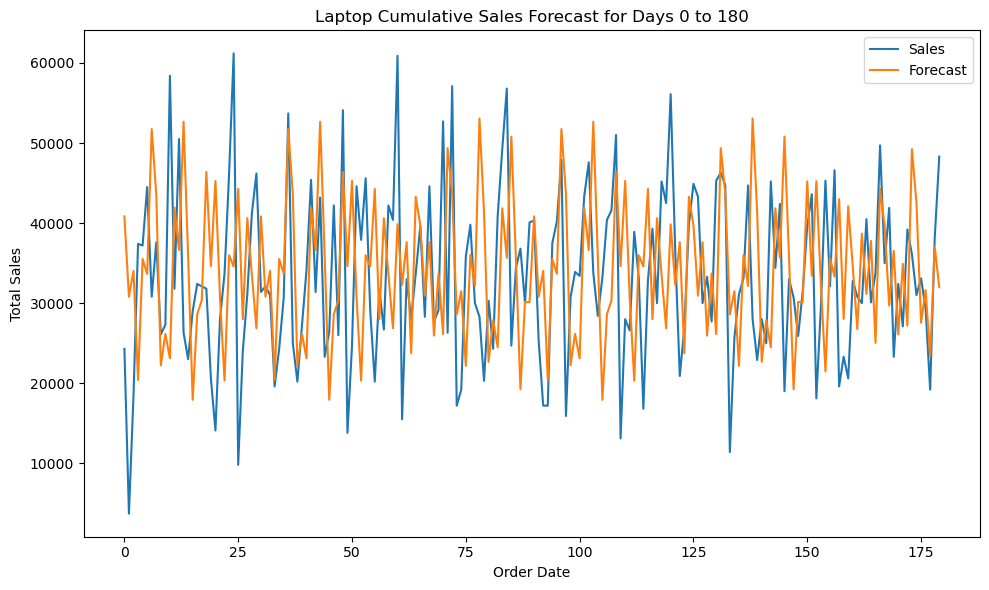

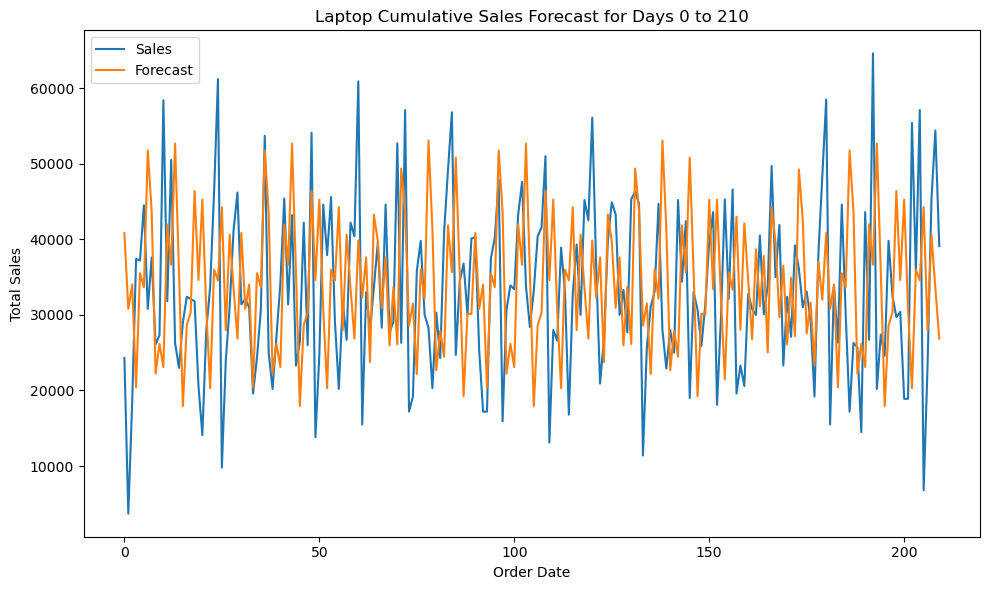

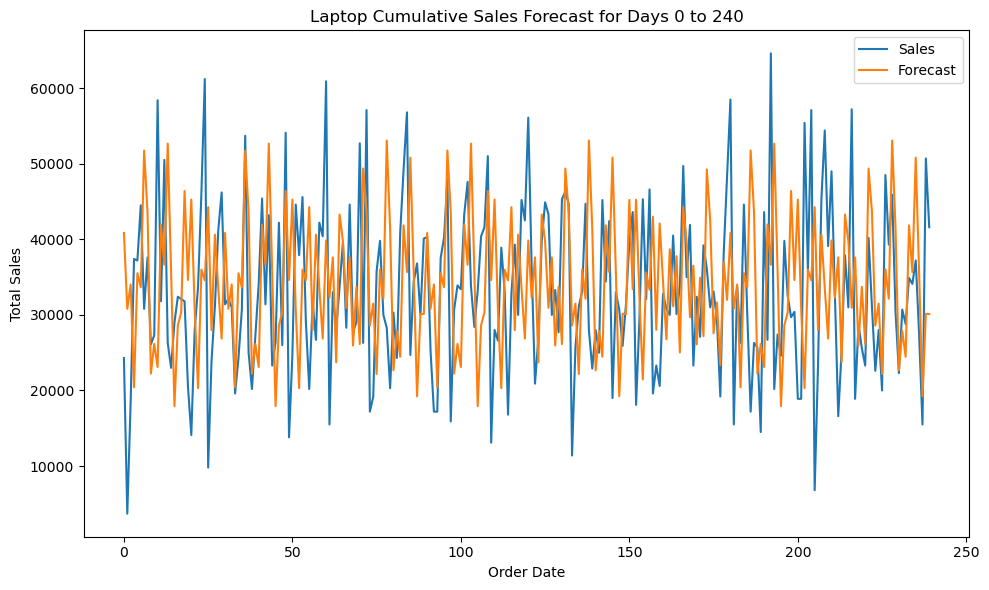

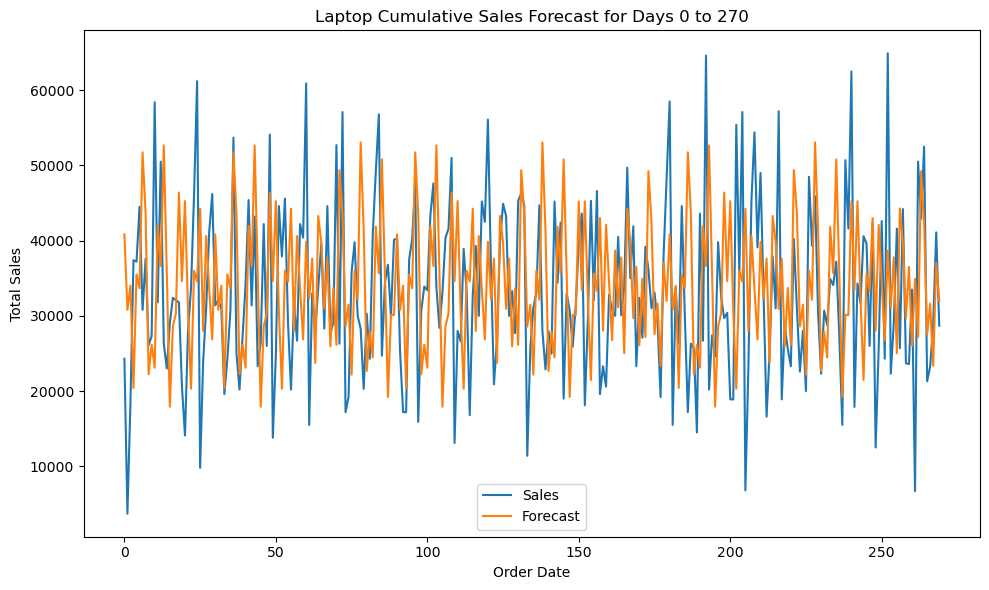

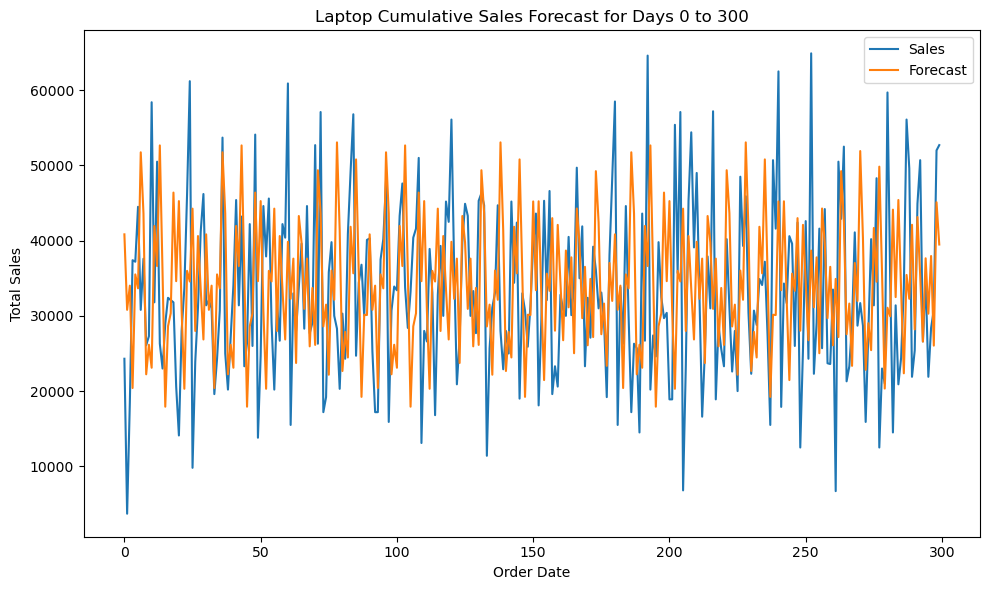

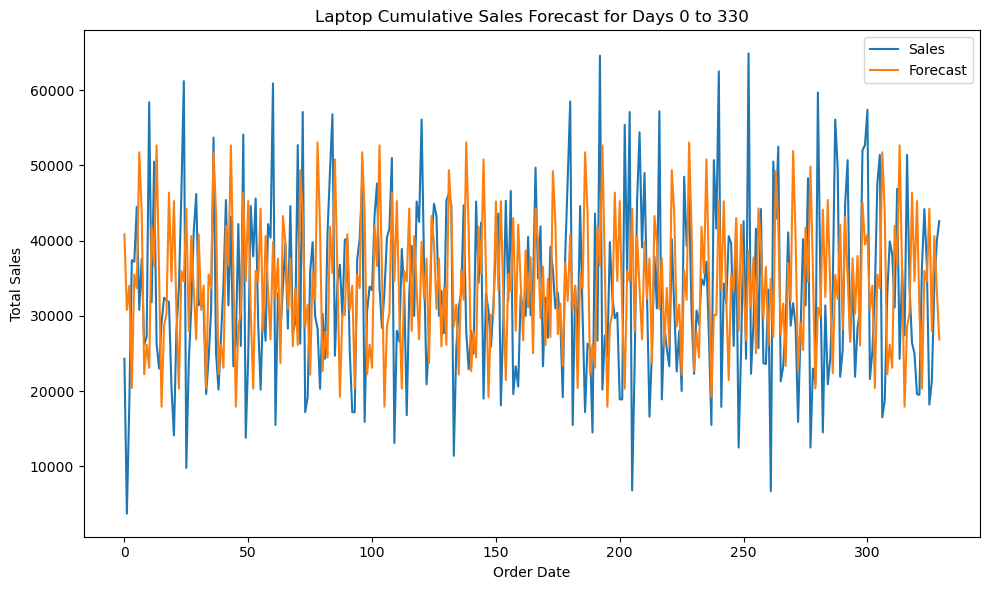

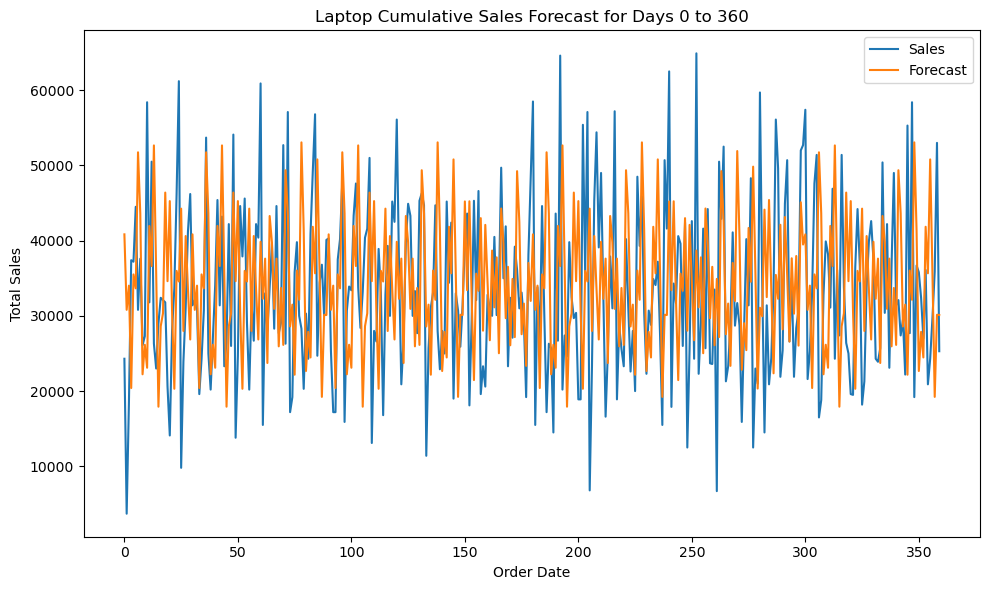

In [43]:
import matplotlib.pyplot as plt

# Define the number of days per "month"
month_length = 30

# Calculate the number of "months"
num_months = int(len(combined_data) / month_length)

# Initialize an empty array to store the cumulative forecast
cumulative_forecast = []

# Loop through each "month"
for i in range(num_months):
    start_index = 0
    end_index = (i + 1) * month_length

    month_data = combined_data.iloc[:end_index]
    month_forecast = forecast.iloc[:end_index]
    dates = month_data.index

    # Add the current forecast to the cumulative forecast
    cumulative_forecast.extend(month_forecast)

    # Adjust the length of cumulative_forecast
    cumulative_forecast_adjusted = cumulative_forecast[:len(dates)]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, month_data.values, label='Sales')
    plt.plot(dates, cumulative_forecast_adjusted, label='Forecast')
    
    # Adjust title based on the 30-day increment
    month_label = f"Days 0 to {end_index}"
    plt.title(Product + ' Cumulative Sales Forecast for ' + month_label)

    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()
